---
title: Lecture 2
subtitle: Morphological Operations and Thresholding
date: 2024-09-02
downloads:
  - file: 02_lecture.ipynb
    title: 02_lecture.ipynb
---

In [2]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

## Erosion

[Erosion](wiki:Erosion_(morphology)) in image processing is a morphological operation that reduces the boundaries of foreground objects in a binary image. It works by applying a structuring element ([kernel](wiki:Kernel_(image_processing))[^kernel]) to each pixel, shrinking object boundaries and removing small noise, effectively eroding away the edges of objects. 

:::{tip}
This operation is useful for separating objects that are close together or for removing small details.
:::

[^kernel]: A kernel is a small matrix used for image processing operations. This is accomplished by doing a convolution between the image and the kernel. The accompanying video does an excellent job of describing what a convolution is.
    :::{iframe} https://www.youtube.com/embed/KuXjwB4LzSA?si=_CbjXaPekJcN5PYY
    :width: 100%
    But what is a convolution?
    :::

### Isotropic erosion

Isotropic erosion uniformly shrinks object boundaries in all directions.

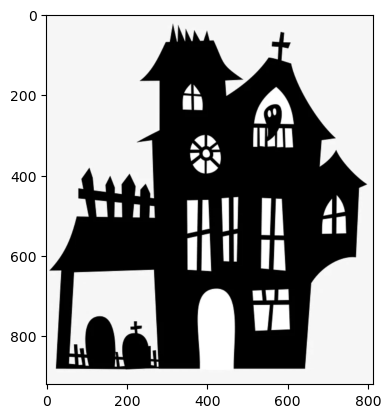

In [3]:
house_img = cv2.imread(os.path.relpath('assets/ShadowHouse.png'), cv2.IMREAD_GRAYSCALE)
plt.imshow(house_img, cmap='gray', vmin=0, vmax=255)
plt.show()

Creates a 15x15 kernel of ones and uses it to erode the image via the [erode](#card-erode) function, shrinking object boundaries. The eroded image is then displayed in grayscale using Matplotlib.

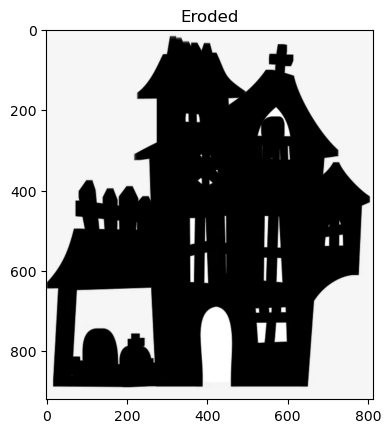

In [4]:
# Create a 15x15 kernel (structuring element) filled with ones, used for the erosion operation
kernel = np.ones((15,15), dtype=np.uint8)

# shrink the boundaries of the objects in the image via erosion 
img_eroded = cv2.erode(house_img, kernel)

# Display the eroded image using Matplotlib in grayscale
plt.imshow(img_eroded, cmap='gray', vmin=0, vmax=255); plt.title('Eroded')
plt.show()

### Anisotropic erosion

Anisotropic erosion is not uniform in all directions.

This code creates two custom kernels for vertical and horizontal erosion, applies these kernels to an image to perform directional erosion, and then displays the resulting vertically and horizontally eroded images side by side.

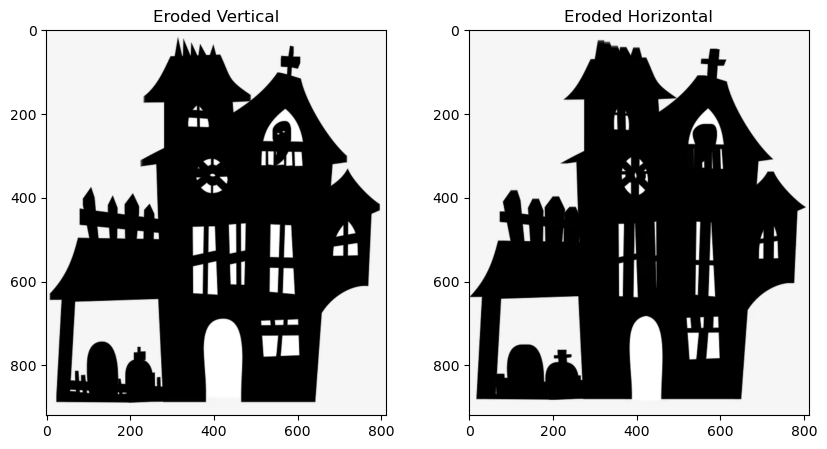

In [5]:
# Create a vertical kernel with a column of ones in the center
kernel_vert = np.zeros((15,15), dtype=np.uint8)
kernel_vert[:, 7] = 1

# Create a horizontal kernel with a row of ones in the center
kernel_horiz = np.zeros((15,15), dtype=np.uint8)
kernel_horiz[7, :] = 1

# Apply vertical erosion to the image using the vertical kernel
img_eroded_vert = cv2.erode(house_img, kernel_vert)

# Apply horizontal erosion to the image using the horizontal kernel
img_eroded_horiz = cv2.erode(house_img, kernel_horiz)

# Display the results: vertical erosion on the left, horizontal erosion on the right
plt.figure(figsize=[10, 5])
plt.subplot(121); plt.imshow(img_eroded_vert, cmap='gray', vmin=0, vmax=255); plt.title('Eroded Vertical')
plt.subplot(122); plt.imshow(img_eroded_horiz, cmap='gray', vmin=0, vmax=255); plt.title('Eroded Horizontal')
plt.show()

The image shows the effects of vertical and horizontal erosion on a silhouette of a haunted house. The left side displays the result of vertical erosion, where the image is primarily shrunk along the vertical axis, reducing the height of vertical features. The right side shows the result of horizontal erosion, where the image is primarily shrunk along the horizontal axis, narrowing the width of horizontal features.

## Dilation

[Dilation](wiki:Dilation_(morphology)) in image processing is a morphological operation that increases the boundaries of foreground objects in a binary image. We can use the [dilate](#card-dilate) to accomplish this in Python. It works by applying a structuring element kernel to each pixel, expanding object boundaries. 

:::{tip}
This operation is useful for object detection by merging or connecting separate components into a single object.
:::

A 15x15 kernel of ones is created for dilation to expand object boundaries in the image. Additionally, a vertical kernel (with a central column of ones) and a horizontal kernel (with a central row of ones) are generated. The image undergoes standard dilation using the full 15x15 kernel, vertical dilation with the vertical kernel, and horizontal dilation with the horizontal kernel. The results are then displayed side by side: the fully dilated image, the vertically dilated image, and the horizontally dilated image.

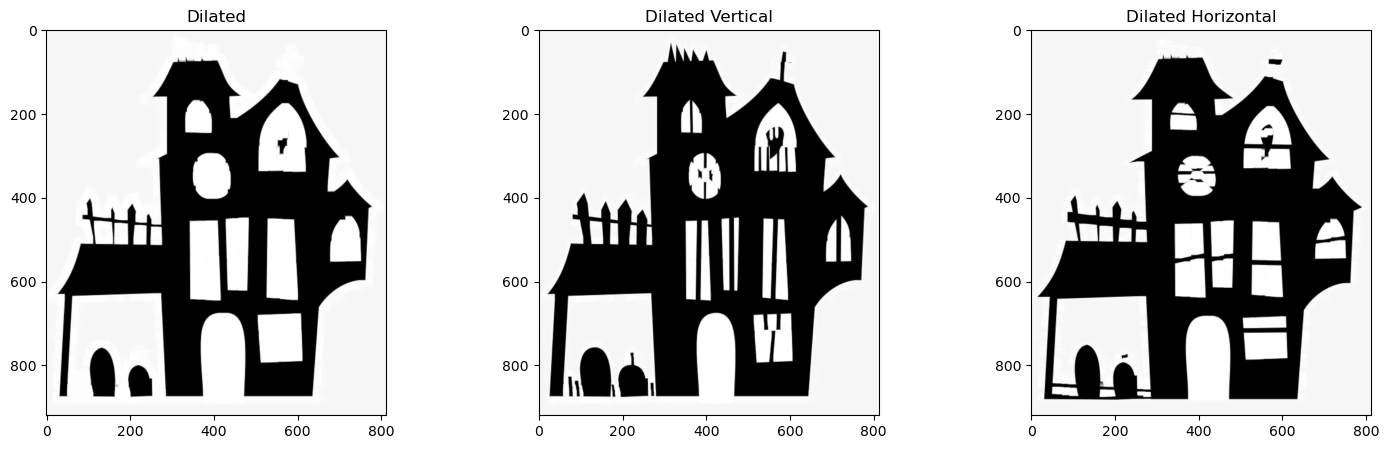

In [8]:
# Create a 15x15 kernel (structuring element) filled with ones, used for the erosion operation
kernel = np.ones((15,15), dtype=np.uint8)

# Create a vertical kernel with a column of ones in the center
kernel_vert = np.zeros((15,15), dtype=np.uint8)
kernel_vert[:, 7] = 1

# Create a horizontal kernel with a row of ones in the center
kernel_horiz = np.zeros((15,15), dtype=np.uint8)
kernel_horiz[7, :] = 1

# expand the boundaries of the objects in the image via dilation 
img_dilated = cv2.dilate(house_img, kernel)

# Apply vertical dilation to the image using the vertical kernel
img_dilated_vert = cv2.dilate(house_img, kernel_vert)

# Apply horizontal dilation to the image using the horizontal kernel
img_dilated_horiz = cv2.dilate(house_img, kernel_horiz)

# Display the results: vertical erosion on the left, horizontal erosion on the right
plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(img_dilated, cmap='gray', vmin=0, vmax=255); plt.title('Dilated')
plt.subplot(132); plt.imshow(img_dilated_vert, cmap='gray', vmin=0, vmax=255); plt.title('Dilated Vertical')
plt.subplot(133); plt.imshow(img_dilated_horiz, cmap='gray', vmin=0, vmax=255); plt.title('Dilated Horizontal')
plt.show()

The image demonstrates the effects of dilation on a haunted house silhouette. The left shows uniform dilation, where the entire structure expands. The middle illustrates vertical dilation, thickening vertical features, while the right shows horizontal dilation, widening horizontal elements.

## Opening

[Opening](wiki:Opening_(morphology)) is erosion followed by dilation. We can use the [morphologyEx](#card-morphologyEx) function to accomplish this in Python. The code below applies morphological opening (erosion followed by dilation) to an image using a 3x3 kernel with 1, 10, and 25 iterations. It then displays the original image alongside the results of each opening operation.

:::{tip}
Opening is used in image processing to remove small objects or noise from the foreground of a binary image while preserving the shape and size of larger objects. It’s effective for smoothing object contours and separating close objects.
:::

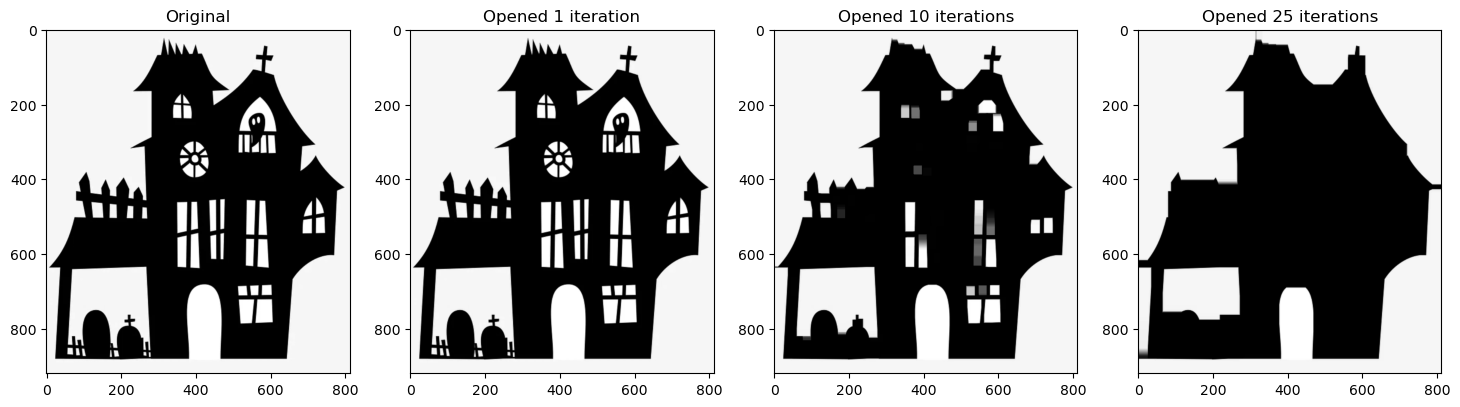

In [14]:
# Create a 3x3 kernel for morphological operations
kernel = np.ones((3,3), dtype=np.uint8)

# Apply morphological opening (erosion followed by dilation)
house_open_1 = cv2.morphologyEx(house_img, cv2.MORPH_OPEN, kernel, iterations=1)
house_open_10 = cv2.morphologyEx(house_img,cv2.MORPH_OPEN,kernel,iterations=10)
house_open_25 = cv2.morphologyEx(house_img,cv2.MORPH_OPEN,kernel,iterations=25)

# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(141);plt.imshow(house_img, cmap="gray");  plt.title("Original")
plt.subplot(142);plt.imshow(house_open_1, cmap="gray");  plt.title("Opened 1 iteration")
plt.subplot(143);plt.imshow(house_open_10, cmap="gray");plt.title("Opened 10 iterations")
plt.subplot(144);plt.imshow(house_open_25, cmap="gray");plt.title("Opened 25 iterations")
plt.show()

The image displays the effects of applying morphological opening on a haunted house silhouette with increasing iterations. The original image is on the far left. As the number of iterations increases (1, 10, and 25 from left to right), the image becomes progressively smoother, with small details and fine features gradually eroding away, leaving only the larger, more prominent structures in the final iteration.

## Closing